# Project: Communicate Data Findings 


## Table of Contents 

<a href="#T1"><b>Introduction </b></a>
   <li> <a href="#T1_1">Data Source </a></li>
   <li> <a href="#T1_2">Libraries </a></li>
<a href="#T2"><b>Data Wrangling </b></a>
    <li> <a href="#T2_1">Data Gathering </a></li>
    <li> <a href="#T2_2">Data Assessing </a></li>
    <li> <a href="#T2_3">Data Cleaning </a></li>
<a href="#T3"><b>Exploratory Visualization</b></a>
    <li> <a href="#T3_1">Univariate Exploration </a></li>
    <li> <a href="#T3_2">Bivariate Exploration </a></li>
    <li> <a href="#T3_3">Multivariate Exploration </a></li>
    
<a href="#T4"><b>Reference:</b></a>


<a id ='T1'> </a>
# Introduction

This Jupyter Notebook contains sections of the exploration, starting from loading in the data, working through univariate visualizations, and ending with bivariate and multivariate exploration. 

<a id ='T1_1'> </a>
## 1. Data Source
* **Ford GoBike System Data:**  
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area ([Link](https://www.lyft.com/bikes/bay-wheels/system-data)).

* **Data Range:**  
Since the data after 04/2019 is showing as baywheels data and in different format, so we will request the data from \ from 04/2018 - 04/2019.

<a id ='T1_2'> </a>
## 2. Libraries

In [231]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import glob
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from sklearn.cluster import KMeans
import geopy.distance
import calendar  
import math    
from IPython.display import Image 

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline


****
<a id ='T2'> </a>
# Data Wrangling
<a id ='T2_1'> </a>
## Data Gathering

In [156]:
# Get a list of year month name to bettwe embed to url 
data_range = ['2018' + str(x).zfill(2) for x in range(4,13)] + ['2019' + str(x).zfill(2) for x in range(1,5)]

# Loop over url to request data 
for ele in data_range:
    url = 'https://s3.amazonaws.com/baywheels-data/{}-fordgobike-tripdata.csv.zip'.format(ele)
    # Request Data 
    response = requests.get(url)
    
    # Save Data Zip data 
    with open('Data/{}-fordgobike-tripdata.csv.zip'.format(ele), mode ="wb") as file:
        file.write(response.content)

In [157]:
#loop over file names
files = [x for x in os.walk("./Data")][0][2]
for x in files:
    if ".zip" in x:
        with zipfile.ZipFile("./Data/{}".format(x),'r') as zip_ref:
            zip_ref.extractall("./Data")

In [158]:
all_filenames = [i for i in glob.glob('Data/*.csv')]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [161]:
combined_csv.to_csv('./Data/raw_data.csv', index = False)

<a id ='T2_2'> </a>
## Data Assessing

In [211]:
raw_data = pd.read_csv('./Data/raw_data.csv')

In [212]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421723 entries, 0 to 2421722
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 258.7+ MB


In [213]:
raw_data.shape

(2421723, 14)

In [214]:
raw_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,No
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,No
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,Yes
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,No
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,Yes


In [215]:
raw_data.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           12501
start_station_name         12501
start_station_latitude         0
start_station_longitude        0
end_station_id             12501
end_station_name           12501
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [216]:
raw_data.duplicated().sum()

0

**Quality**
- there are missing values in the station_id, station_name, end_station_name  ,end_station_id columns
- the columns 'start_time' and 'end_time' are not datetime type
- the columns 'start_station_id', 'end_station_id' and 'bike_id' are not object type

<a id ='T2_3'> </a>
## Data Cleaning

In [230]:
# Make a copy before cleaning 
bike_data = raw_data.copy()

- Remove missing values in station_id, station_name, end_station_name ,end_station_id columns since the missing values appear in those four columns in the same time

In [231]:
bike_data.dropna(subset=['start_station_id'], axis =0, inplace = True)

In [232]:
# Test If all the missing values have been removed 
assert bike_data.isnull().sum().max() ==0

- Change columns 'start_time' and 'end_time' to datetime type

In [233]:
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [234]:
# Test if the Start time and end time columns have changed to dateype 
assert (is_datetime(bike_data['end_time']) and is_datetime(bike_data['start_time'])) == True

- Change the columns 'start_station_id', 'end_station_id' and 'bike_id' to string type

In [239]:
columns_to_obj = ['start_station_id','end_station_id','bike_id'] 
for col in columns_to_obj:
    bike_data[col]= bike_data[col].astype(int)
    bike_data[col]= bike_data[col].astype(str)

In [256]:
# Test if all the three columns have been converted to string type 
assert all([bike_data[col].dtype == object  for col in  columns_to_obj ])== True

In [261]:
#export the cleaned csv 
bike_data.to_csv("Data/cleaned_bike_data.csv", index = False)

**** 
<a id ='T3'> </a>
# Exploratory Visualization 

In [7]:
df = pd.read_csv("Data/cleaned_bike_data.csv")

In [8]:
# Datatype change 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

columns_to_obj = ['start_station_id','end_station_id','bike_id'] 
for col in columns_to_obj:
    df[col]= df[col].astype(int)
    df[col]= df[col].astype(str)

<a id ='T3_1'> </a>
## Univariate Exploration
Since the `Duration_sec` column is the only quantitave attributes, lets find some riding patterns. 

* **How long are people riding these bikes?** 

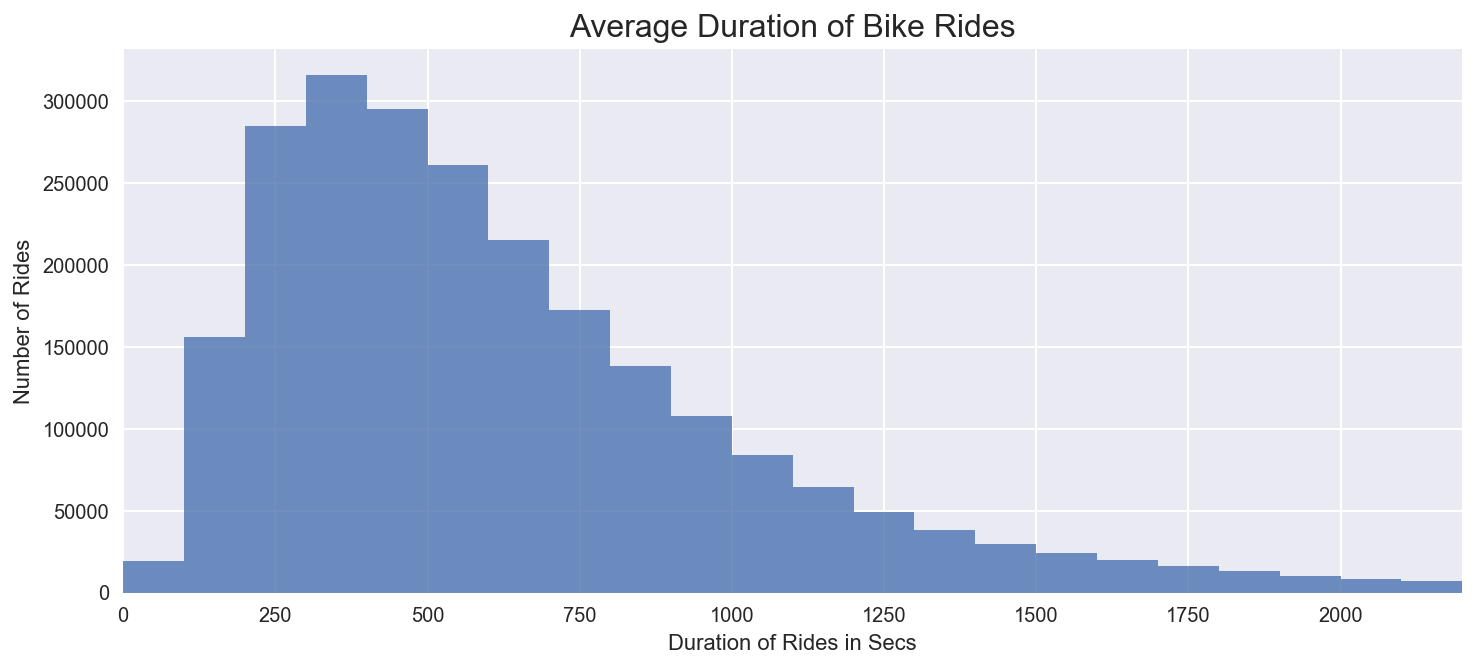

In [51]:
#Visualizing the data in a histogram
plt.figure(figsize= (12,5))
duration_bins = np.arange(0, df['duration_sec'].max() + 200, 100)
sns.distplot(df['duration_sec'], bins = duration_bins, kde = False, hist_kws = {'alpha' : 0.8});

plt.xlim(0, 2200);
plt.style.use('seaborn')
plt.title('Average Duration of Bike Rides', fontsize = 16)
plt.xlabel('Duration of Rides in Secs')
plt.ylabel('Number of Rides')
plt.style.use('seaborn');

- In this analysis we'd like to see the distribution of people riding bikes in secs. Since the distribution is right skewed here we set the top limit of 2200 secs to remove some outliers with extremely long riding time.   
- We can see tha the peak usesage falls in 250-740 secs which is around 4.5mins, so generally speaking, people like to use gobike for short routes.   

**What would be the distribution looks like if we use the log transformation? ** 

In [124]:
min_duration = df.query('duration_sec <=3000')['duration_sec'].min()
max_duration = df.query('duration_sec <=3000')['duration_sec'].max()

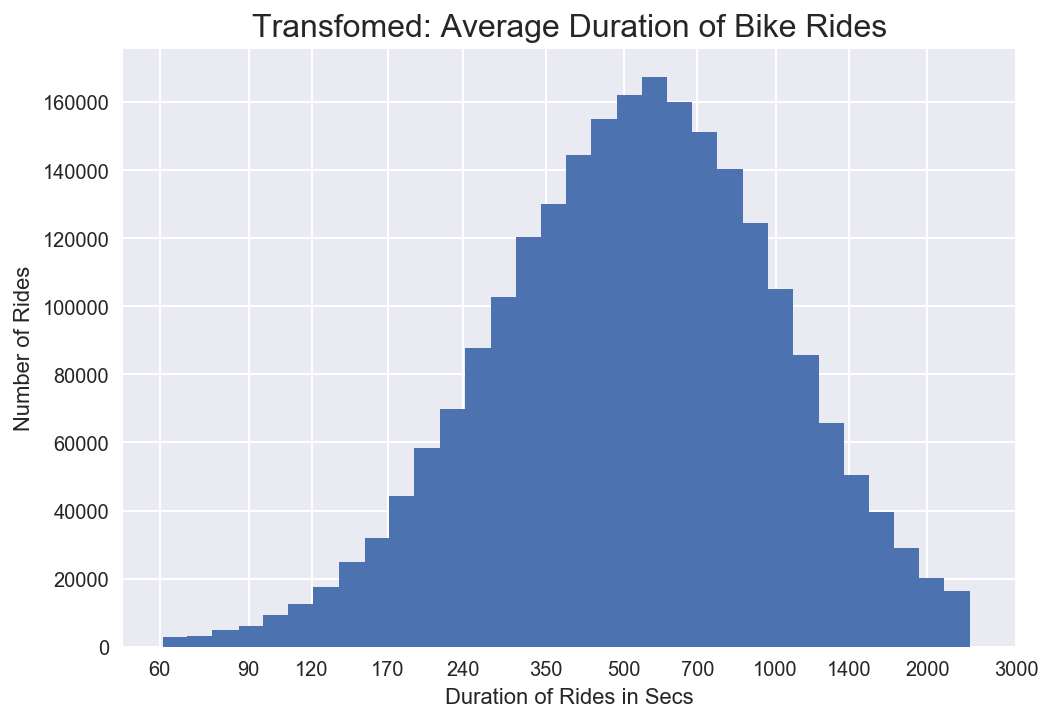

In [231]:
# Create bins
duration_bins = 10** np.arange( math.log10(min_duration),3+0.4, 0.05)
duration_bins = list(dict.fromkeys([math.trunc(x) for x in duration_bins]))

# Rename Ticks 
ticks = [60, 90, 120, 170, 240, 350, 500, 700, 1000, 1400, 2000, 3000 ]
labels = ['{}'.format(val) for val in ticks]

plt.hist(df.query('duration_sec <=3000')['duration_sec'] , bins = duration_bins);

plt.xscale('log')
plt.style.use('seaborn')
plt.title('Transfomed: Average Duration of Bike Rides', fontsize = 16)
plt.xlabel('Duration of Rides in Secs')
plt.ylabel('Number of Rides')
plt.xticks(ticks, labels); 

- From this log transformed plot, we can see that the duration of rides looks normal distribution with most of the rides fall under (350-1000 secs) which is reasonable for short distance ride.

**Where are top 15 places people like to take a ride? **

In [291]:
# Keep only the main address
df['start_station_name_abbr']=  df.start_station_name.apply(lambda x: x.split('(')[0])

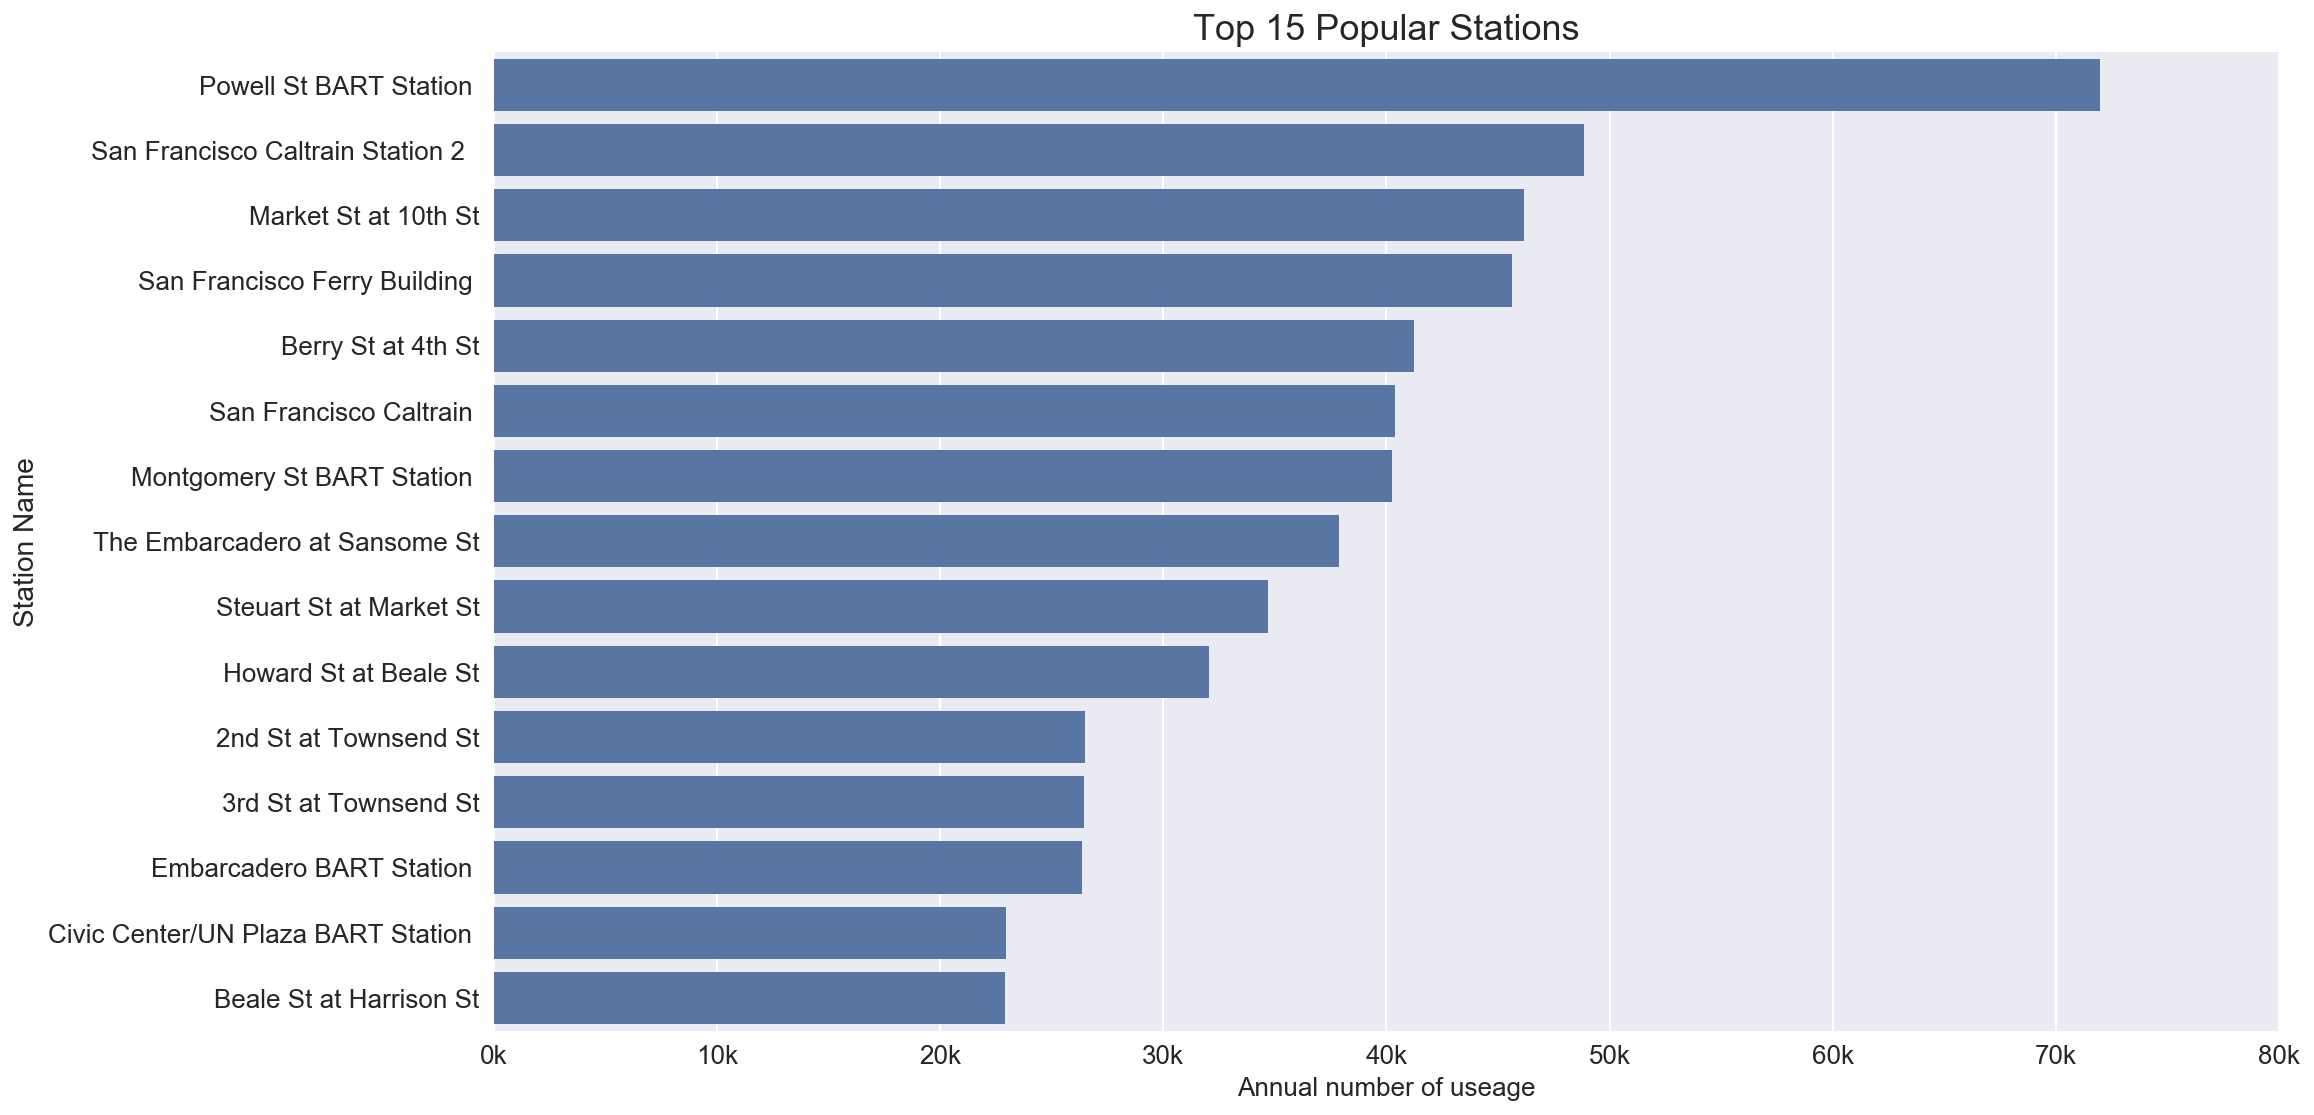

In [295]:
ticks= np.arange(0, 90000, 10000)
labels = ['{}k'.format(math.trunc(val/1000)) for val in ticks]

plt.figure(figsize=(16,9))
sns.countplot(data = df, y='start_station_name_abbr',
              order = df.start_station_name_abbr.value_counts()[:15].index, color= sns.color_palette()[0])
plt.xticks(ticks, labels,fontsize= 13)
plt.yticks(fontsize= 13)
plt.xlabel('Annual number of useage',fontsize= 13)
plt.ylabel('Station Name',fontsize= 14)
plt.title('Top 15 Popular Stations',fontsize= 18);

- Its unexpectly to see that many of start places are around Station (Caltrain, Bart Station). This finding isnt really surprising so lets see what are the proportion of commute ride (either start place or end place is station).  

**The proportion of Commute Rides? Any specific public transportation related to those commute rides?**

In [9]:
# Since Bay area has port, lets also count Ferry in
commute_keys = ['BART Station','Ferry','Caltrain Station']

In [10]:
commute_ride = [] 
check_start_station = df['start_station_name'].apply(lambda x: any([word in x for word in commute_keys]))
check_end_station = df['end_station_name'].apply(lambda x: any([word in x for word in commute_keys]))

In [11]:
def check_commute(start, end):
    commute_ride = [] 
    for i, j in zip(start,end):
        if i== True or j== True:
            commute_ride.append('Commute Ride')
        else:
            commute_ride.append('Normal Ride') 
    return commute_ride
df['commute_ride'] = check_commute(check_start_station, check_end_station)

In [12]:
# Get a detailed information to show which public transpotation that people like to take rides more
commute_info = []
df_commute = df.query('commute_ride == "Commute Ride"')

for idx, row in df_commute[['start_station_name','end_station_name']].iterrows():
    if ('BART Station' in row['start_station_name']) or ('BART Station' in row['end_station_name']):
        commute_info.append('BART Station')
    elif ('Ferry' in row['start_station_name']) or ('Ferry' in row['end_station_name']):
        commute_info.append('Ferry')
    else: 
        commute_info.append('Caltrain Station')
df_commute['commute_info'] = commute_info

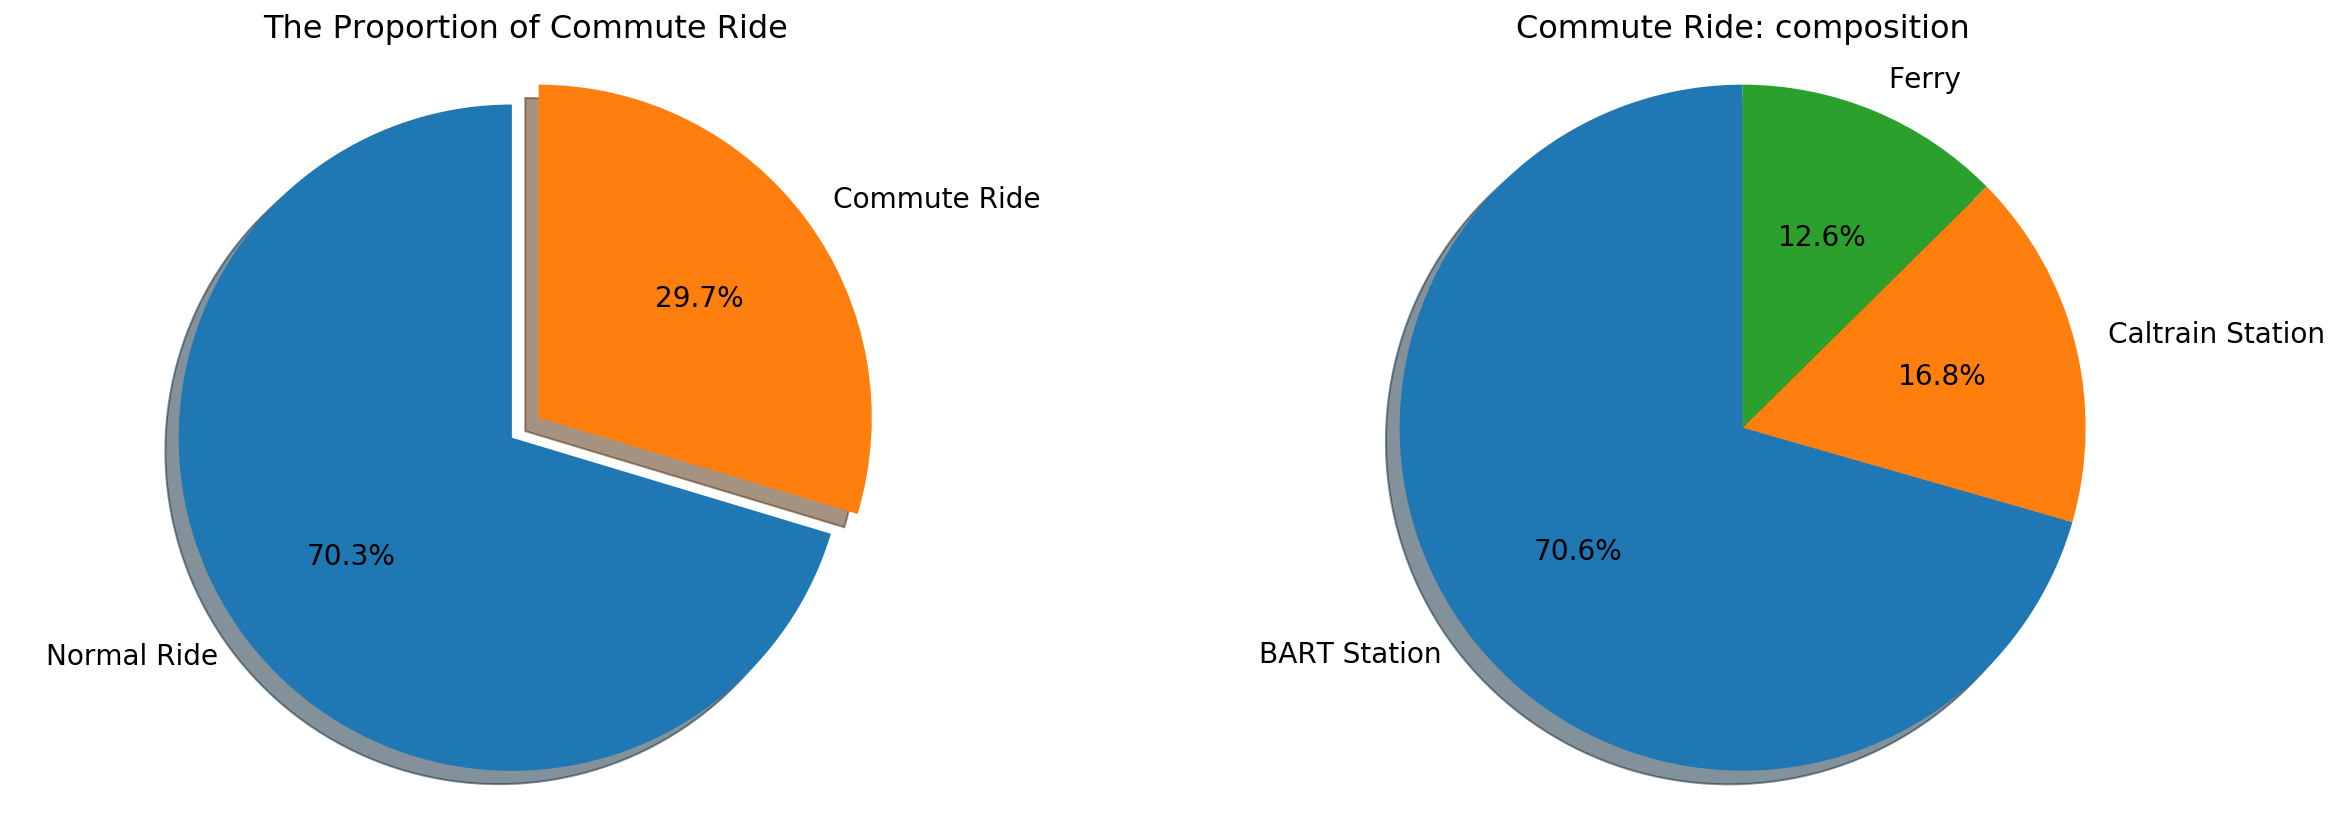

In [25]:
plt.figure(figsize = (20,7))
plt.subplot(1,2, 1)
labels = df.commute_ride.value_counts().index
sizes = (df.commute_ride.value_counts()/df.commute_ride.value_counts().sum()).tolist()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, labels = labels,\
        autopct='%1.1f%%', explode = explode, shadow=True, startangle=90,textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The Proportion of Commute Ride', fontsize= 16)

plt.subplot(1,2,2)
df_commute = df_commute[['commute_info']]
plt.pie((df_commute.commute_info.value_counts()/df_commute.commute_info.value_counts().sum()).tolist(),\
        labels = df_commute.commute_info.value_counts().index,\
        autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 14});
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Commute Ride: composition', fontsize= 16);

- Now we can see that, nearly 30% of the rides are communite rides related, and within these commute rides, people like to take ride to or out from Bart station.

<a id ='T3_2'> </a>
## Bivariate Exploration
-After discovered some simple patterns of the ride, lets dive into the trip's information.

**When are most trips taken in terms of day of the week?**

In [27]:
df['start_weekday'] = df['start_time'].apply(lambda x: calendar.day_name[x.weekday()])
df['start_month'] = df['start_time'].apply(lambda x: x.month)
df['start_day'] = df['start_time'].apply(lambda x: x.day)
df['start_hour'] = df['start_time'].apply(lambda x: x.hour)
# Create ordinal of weekday 
ordinal_weekday= ['Monday', 'Tuesday','Wednesday',  'Thursday' ,'Friday','Saturday','Sunday']
week_classes = pd.api.types.CategoricalDtype(ordered= True, categories = ordinal_weekday)
df['start_weekday'] = df['start_weekday'].astype(week_classes)

In [28]:
df_weekday = df.start_weekday.value_counts().reset_index(name = "count")

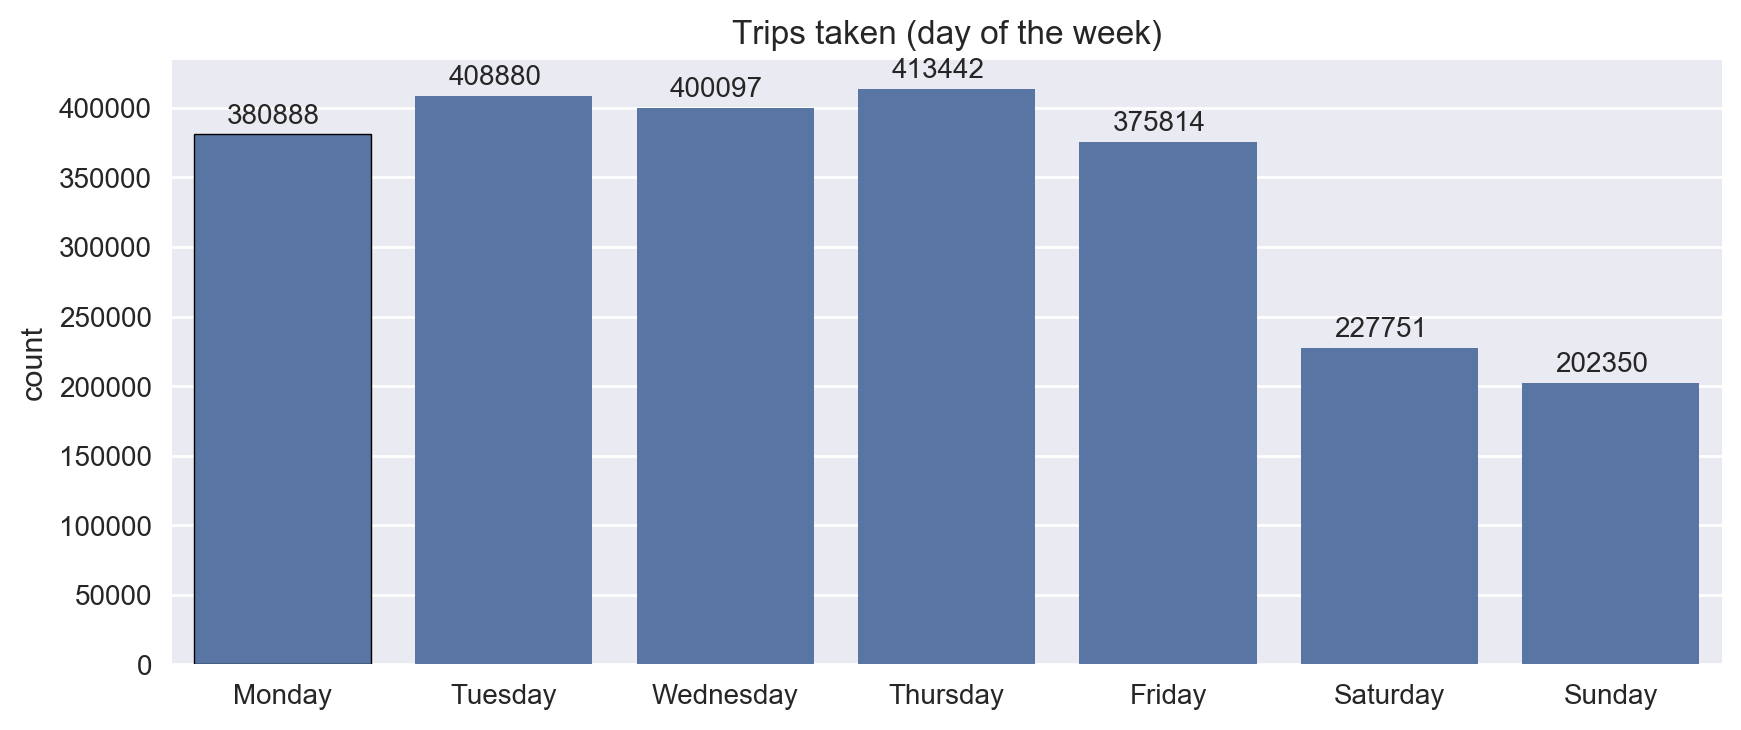

In [370]:
fig, axes = plt.subplots(figsize = (10,4), dpi = 100)
sns.barplot(data = df_weekday, x= 'index',y='count', color= sns.color_palette()[0],lw = 0.5, edgecolor = "black")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis()
cur_axes.axes.get_xaxis().set_label_text('')
sns.despine(fig, left = True)

for p in axes.patches:
    axes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+ 8000))

plt.title('Trips taken (day of the week)'); 

- We can see from the plot that Tuesday to Friday has the most trips taken, followed by Monday and Friday. Trips in  Saturday and Sunday are approximately half of the rides than in weekdays. 

**When are most trips taken in terms of time of the day?**

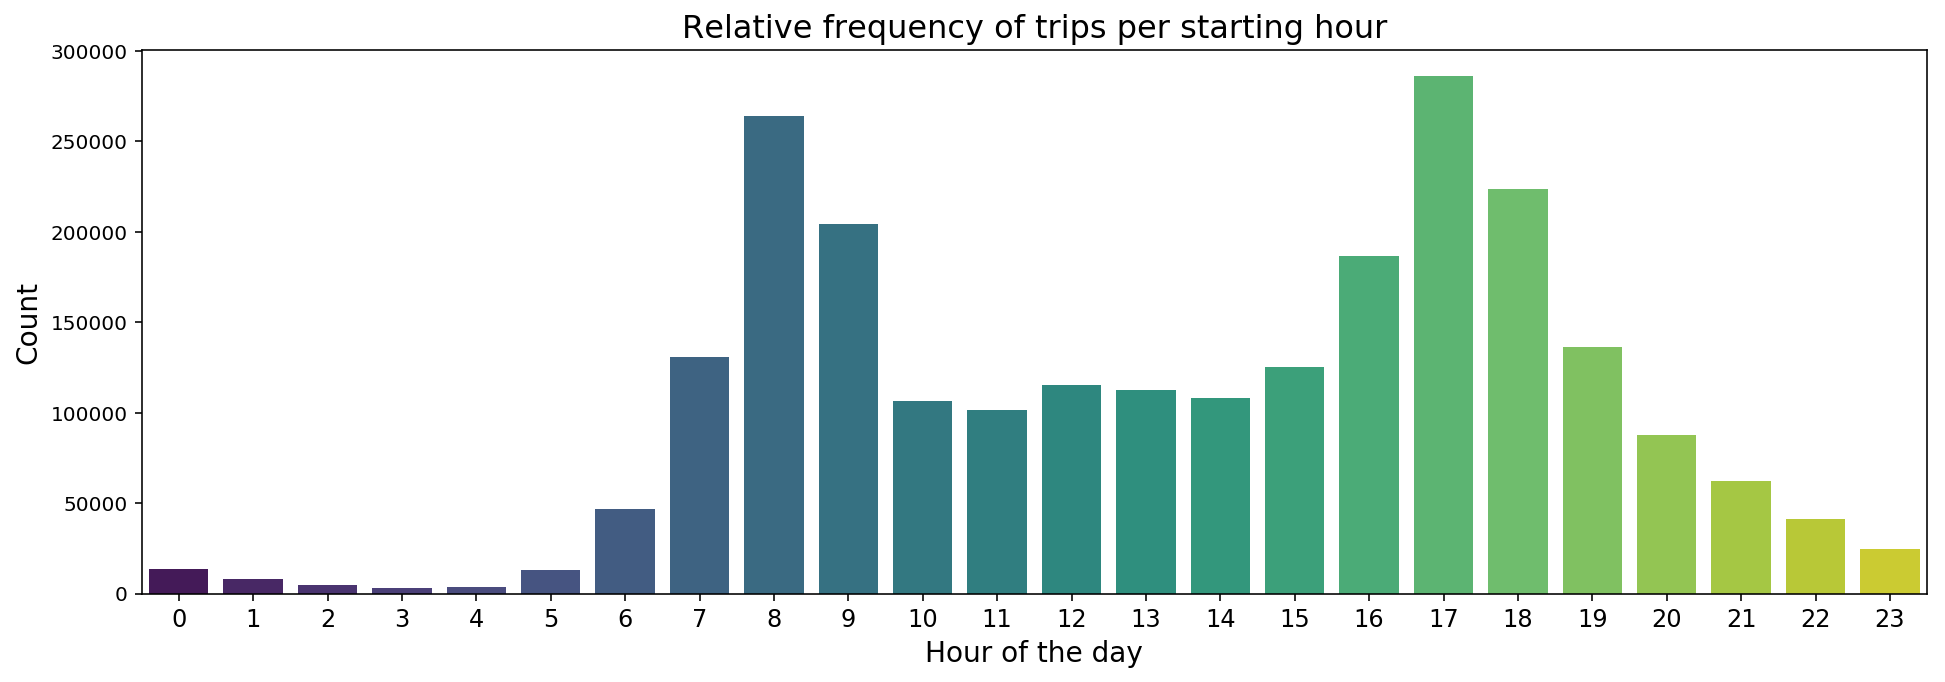

In [30]:
fig, ax = plt.subplots(figsize = (16,5))
sns.countplot(x = "start_hour", data = df, palette = "viridis")
plt.title("Relative frequency of trips per starting hour", fontsize= 16)
plt.xlabel('Hour of the day', fontsize =14)
plt.ylabel('Count',fontsize =14)
plt.xticks( fontsize =12);

The most frequent starting hours are at commute peak time 8 and at 17. Lets see if this pattern is specially for weekday. 

**Are there any peak time of rides in terms day of the week and hours of the day? **

In [31]:
# create bins and cut the hours into 6 bins 
bin_hour = 4
bins_edges = np.arange(0, df['start_hour'].max()+bin_hour , bin_hour)
df['start_hour_binned'] = pd.cut(df['start_hour'], bins_edges, include_lowest = True)

In [32]:
# create a dataframe with grouped by start_hour_binned and start_weekday 
df_grouped_hr = df.groupby(['start_hour_binned','start_weekday']).size().reset_index(name='count')
df_grouped_hr.start_hour_binned = df_grouped_hr.start_hour_binned.astype(str)

In [33]:
# clean up the hour bin infromation 
df_grouped_hr.start_hour_binned =\
df_grouped_hr.start_hour_binned.apply(lambda x: x.split(",")[0].strip('()').strip('.').replace(".0","")) + '-'+\
df_grouped_hr.start_hour_binned.apply(lambda x: x.split(",")[1].strip('(] ').strip('.').replace(".0",""))

df_grouped_hr.loc[df_grouped_hr.start_hour_binned =='-001-4','start_hour_binned'] = "0-4"

In [40]:
# create a pivot table to create heatmap 
heatmap_df = df_grouped_hr.pivot(index = 'start_hour_binned', columns ='start_weekday', values= 'count')

# Reorder the start_hour 
heatmap_df = heatmap_df.loc[['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], :]

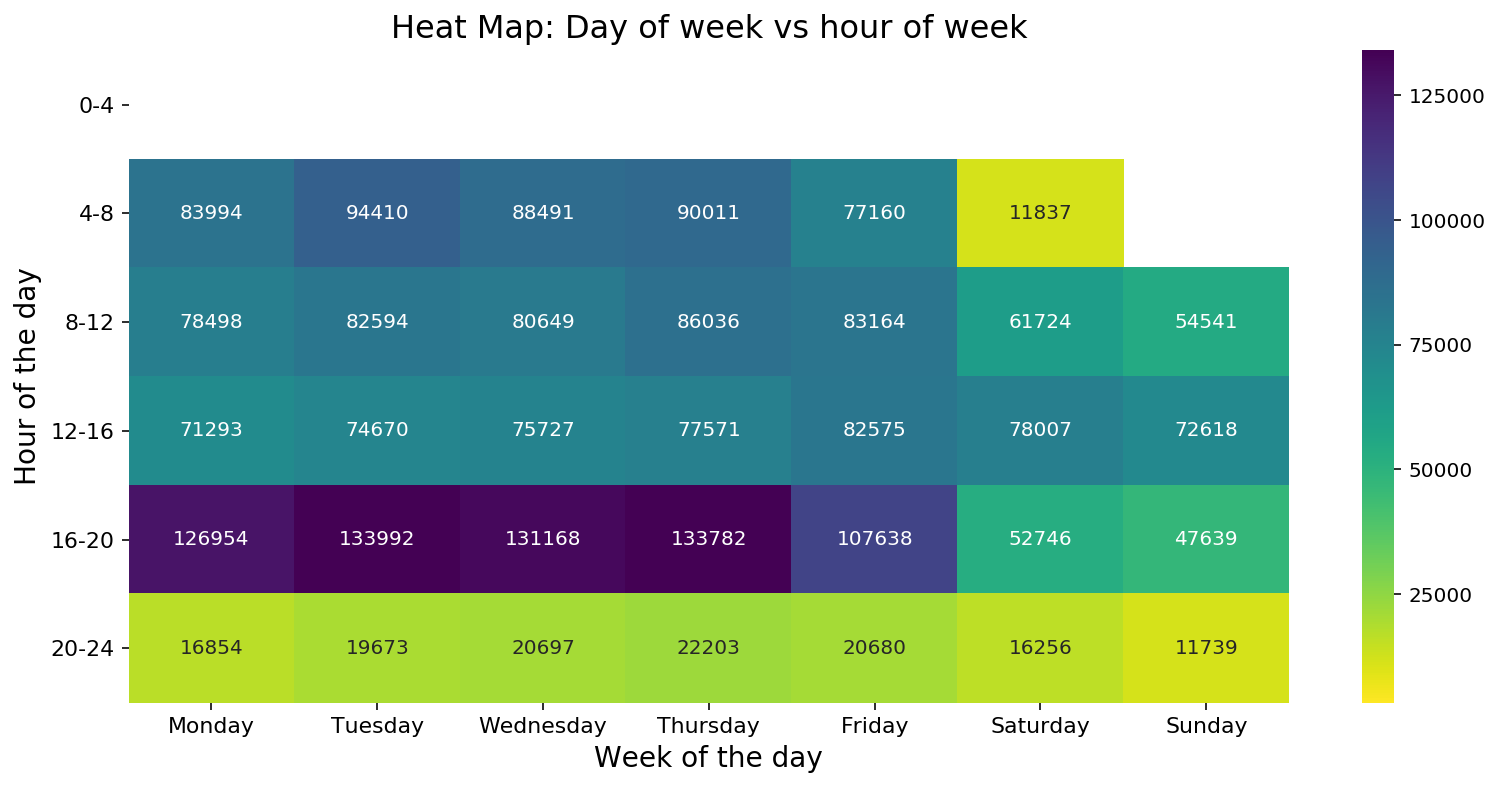

In [58]:
plt.figure(figsize= (13,6))
sns.heatmap(heatmap_df,
            # add annotation 
            annot = True, 
            # all the counts are listed as decimal values can use fmt ='.0f' if we have any cells with no counts
            fmt = 'd', cmap ='viridis_r', mask = (heatmap_df<= 10000))
plt.title("Heat Map: Day of week vs hour of week", fontsize= 16)
plt.xlabel('Week of the day', fontsize =14)
plt.ylabel('Hour of the day',fontsize =14)
plt.xticks( fontsize =11)
plt.yticks( rotation = 0, fontsize =11);

- We can see that oveall people turns to take rides more on Weekday commute time (16-20pm and 8:12am). This pattern is not that obvious during weekend. 

<a id ='T3_3'> </a>
## Multivariate Exploration

Now, lets introduce another variable user_type to see if user have different ride habit of in case of the riding duration in different month.    

**Can we find any interesting riding behaviours between Customer and Subscribe**

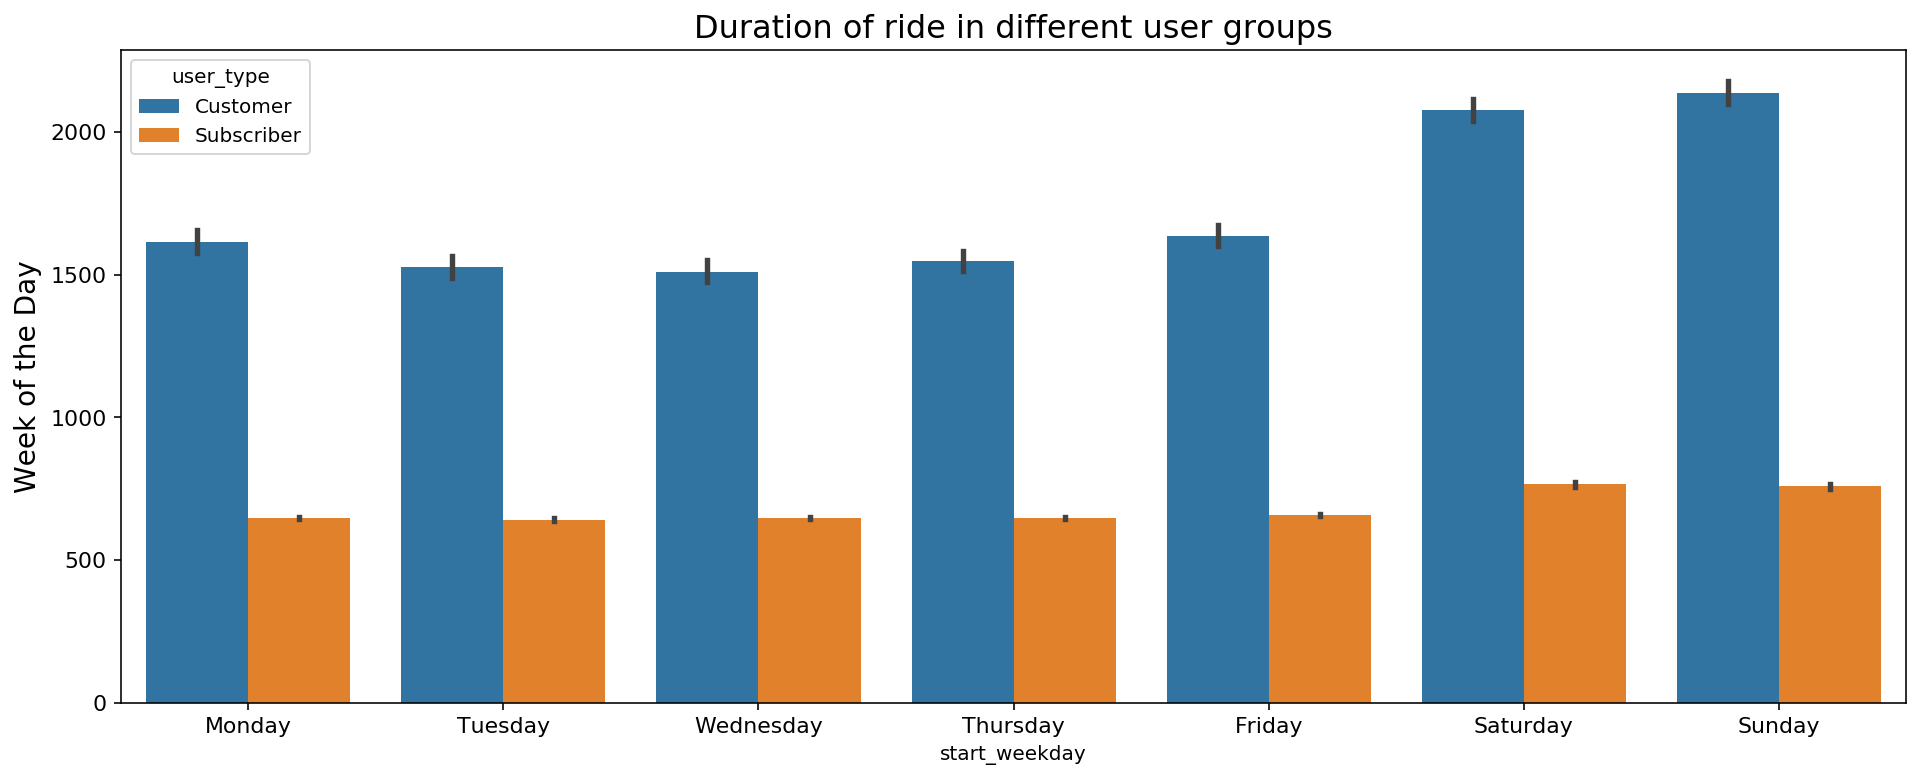

In [67]:
plt.figure(figsize =(16,6)) 
base_color = sns.color_palette()[0]
sns.barplot(data= df, x ='start_weekday', y='duration_sec', hue ='user_type' )  
plt.ylabel("Duration Sec ",  fontsize =14)
plt.ylabel("Week of the Day",  fontsize =14)
plt.title("Duration of ride in different user groups", fontsize= 16)

plt.xticks( fontsize =11)
plt.yticks(fontsize =11);

- We can see that most compared to non-subscribed customer group, the subscribed customer group turns to have ride in slight difference of each day of week and the average ride time is lower. 

**Can we find any patterns in terms of month?**

In [68]:
df['year_month'] = df.start_time.apply(lambda x: str(x)[:7])

In [69]:
df_sample = df.sample(10000).sort_values(by='year_month')

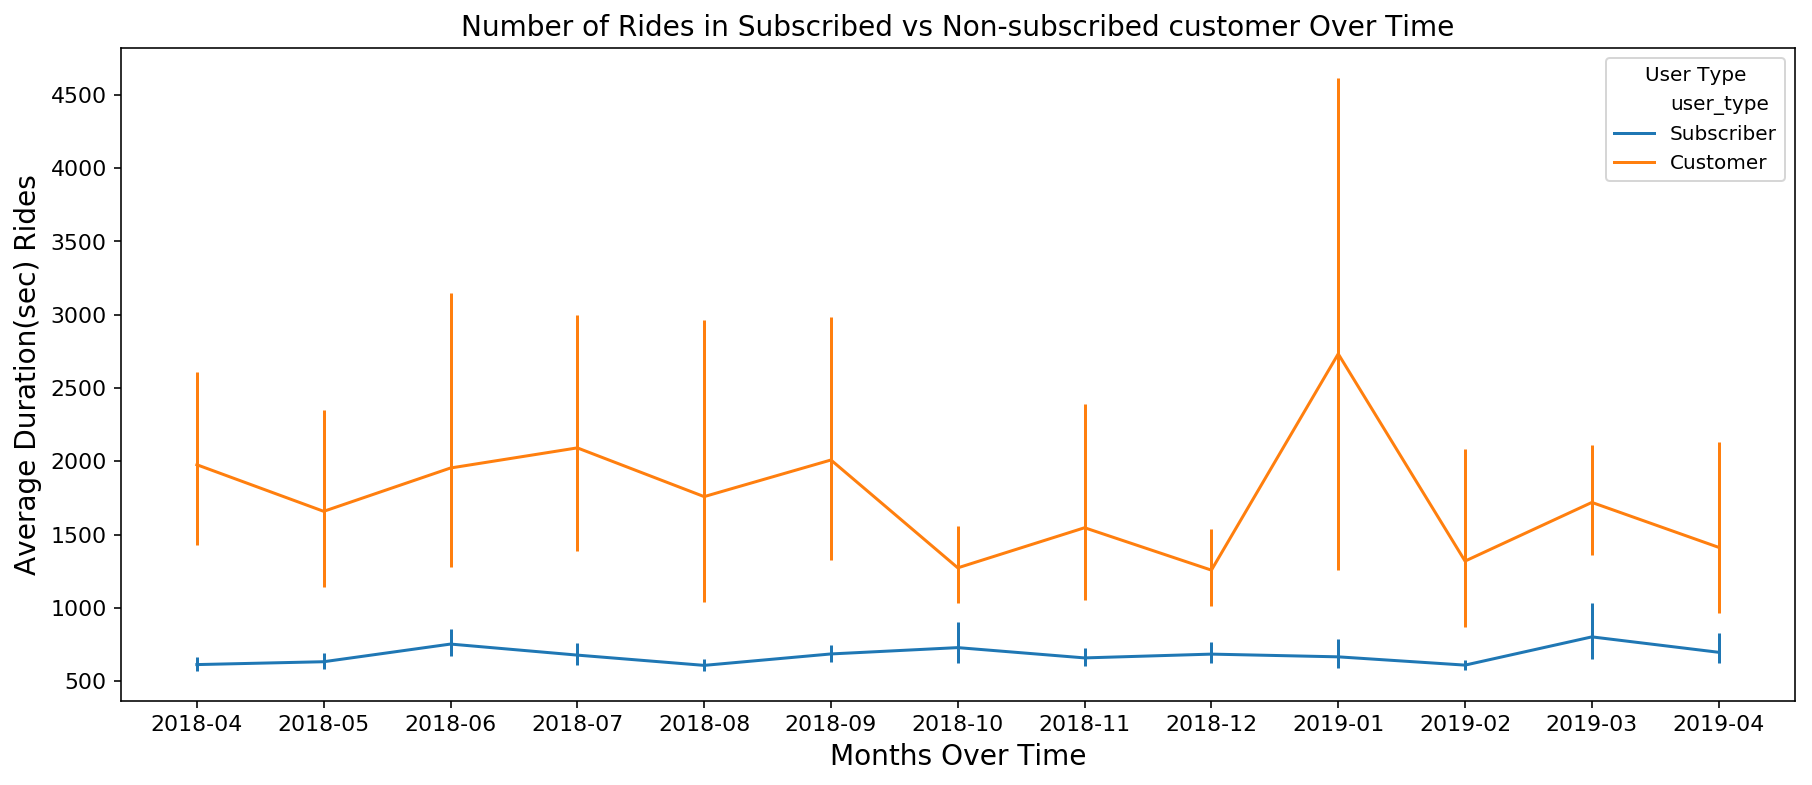

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_sample, x = 'year_month', y = 'duration_sec', markers=True, hue = 'user_type',err_style="bars");
plt.title('Number of Rides in Subscribed vs Non-subscribed customer Over Time', fontsize = 14)
plt.legend(title = 'User Type')
plt.xlabel('Months Over Time',fontsize= 14)
plt.ylabel('Average Duration(sec) Rides',fontsize= 14)

plt.xticks( fontsize =11)
plt.yticks(fontsize =11);

We can see that for the subscriber, the the average ride time is more stable over time while the people turn to ride less on certain months, this may due to the weather issue.

**Can we find similar patterns in terms of Routes Type (Commute/normal)?**

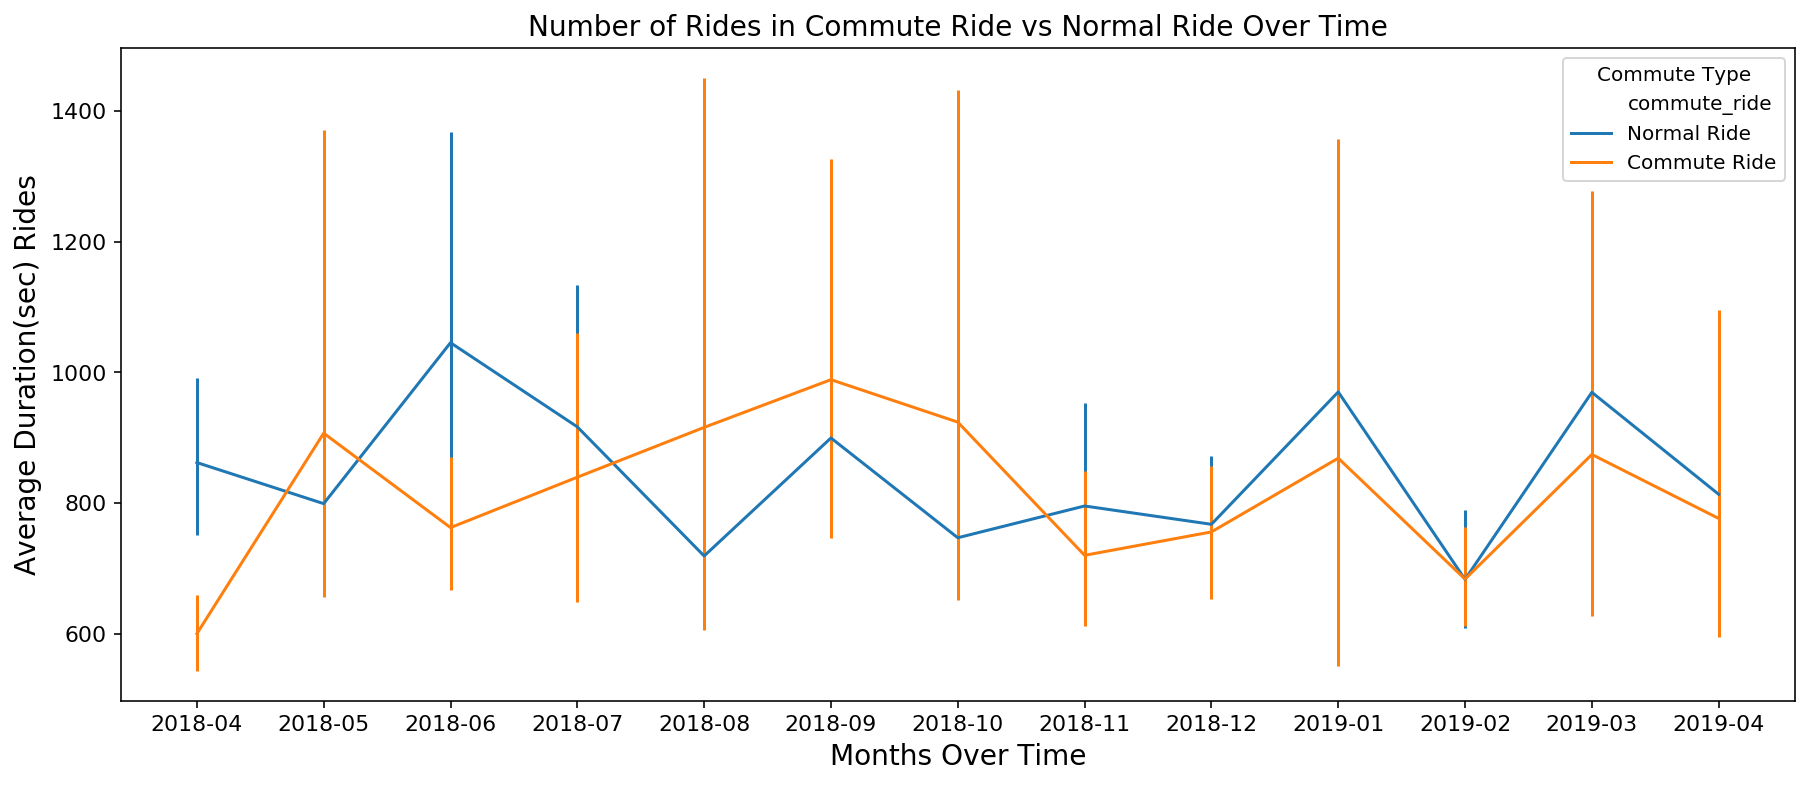

In [76]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_sample, x = 'year_month', y = 'duration_sec', markers=True, hue = 'commute_ride',err_style="bars");
plt.title('Number of Rides in Commute Ride vs Normal Ride Over Time', fontsize = 14)
plt.legend(title = 'Commute Type')
plt.xlabel('Months Over Time', fontsize =14)
plt.ylabel('Average Duration(sec) Rides',fontsize= 14)

plt.xticks( fontsize =11)
plt.yticks(fontsize =11);

This is really unexpected. We found in previous Bivariate visualization analysis that people who take communite ride has an overall more standard duration of ride while if we look this graph by month over month, we found it fluctures a lot. So we may conclude that user type is more important issue to predict the average durcation of rides. 

<a id ='T4'> </a>
## Reference (More)
This section is after i submitted and inspired by the work done by [DataLint](https://github.com/DataLind/Udacity-Data-Analyst-Nanodegree/blob/master/P4-Communicate-Data-Findings/Communicate%20Data%20Findings.ipynb). 

In [98]:
# Lets find the most frequent station magnititude location 
print(df.start_station_longitude.value_counts().nlargest(10))

print(df.start_station_latitude.value_counts().nlargest(10))

-122.395526    48833
-122.417385    46159
-122.394203    45634
-122.393170    41216
-122.395282    40379
-122.400811    40234
-122.404904    39476
-122.403234    37878
-122.394430    34703
-122.408445    32472
Name: start_station_longitude, dtype: int64
37.776639    48833
37.776619    46159
37.795392    45634
37.775880    41216
37.776598    40379
37.789625    40234
37.786375    39476
37.804770    37878
37.794130    34703
37.783899    32472
Name: start_station_latitude, dtype: int64


In [97]:
#all ids are a start- and ending point
start_station_id_list = list(df.start_station_id.drop_duplicates().dropna().astype("int"))
start_station_id_list.sort()

end_station_id_list = list(df.end_station_id.drop_duplicates().dropna().astype("int"))
end_station_id_list.sort()

start_station_id_list == end_station_id_list

True

In [173]:
# Create a station dataframe 
df_station_names = df[["end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude"]].copy()

# Rename the station dataframe columns 
df_station_names.rename(columns=
                        {"end_station_id": "station_id", 
                         "end_station_name": "station_name", 
                         "end_station_latitude": "station_latitude", 
                         "end_station_longitude": "station_longitude"}, inplace = True)

df_station_names.drop_duplicates(inplace = True)
df_station_names.dropna(inplace = True)
df_station_names.sort_values("station_id", inplace = True)
df_station_names.reset_index(inplace = True, drop = True)

df_station_names.shape[0]

401

In [174]:
df_station_names = df_station_names.query('station_latitude!="0.000000"\
                        and station_longitude!="0.000000"')

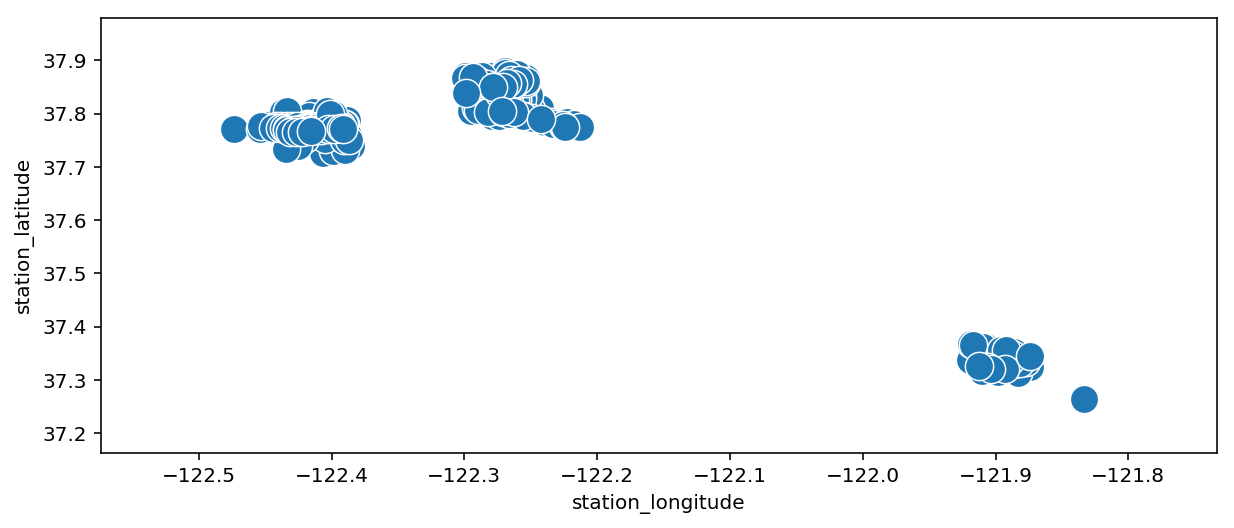

In [175]:
axes, figure = plt.subplots(figsize = (10,4))

sns.scatterplot(data= df_station_names, y ='station_latitude',\
                x='station_longitude', s=200)
# if the plt.tight_output() not works then we can use the 
# min_val - unit and max_val+ to control the limit
plt.ylim(df_station_names.station_latitude.min()-0.1,\
         df_station_names.station_latitude.max()+0.1)
plt.xlim(df_station_names.station_longitude.min()-0.1, \
         df_station_names.station_longitude.max()+0.1);

At first we can see, that there are three clear clusters in this dataset. The website of FordGoBike differs following zones: "San Francisco, East Bay, San José"

In [177]:
df_station_names.station_id.value_counts()\
    [df_station_names.station_id.value_counts()>1]

244    3
212    3
233    3
101    3
280    3
221    3
130    3
208    3
192    3
205    3
272    2
234    2
364    2
302    2
321    2
80     2
344    2
224    2
173    2
37     2
281    2
250    2
358    2
245    2
345    2
Name: station_id, dtype: int64

One id can refer to multiple different stations

In [181]:
df_station_names[df_station_names.duplicated("station_id", keep= False)]\
    .sort_values(by="station_id")

,station_id,station_name,station_latitude,station_longitude
2,101,15th St at Potrero Ave,37.767079,-122.407359
3,101,San Bruno Ave at 16th St,37.766008,-122.405677
4,101,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706
31,130,22nd St Caltrain Station,37.757369,-122.392057
32,130,22nd St Caltrain Station,37.757288,-122.392051
33,130,22nd St Caltrain Station,37.757718,-122.391813
76,173,Shattuck Ave at 55th St,37.840364,-122.264488
77,173,Shattuck Ave at 55th Ave,37.840364,-122.264488
96,192,37th St at West St,37.826696,-122.271797
97,192,37th St at West St,37.826696,-122.271796


It is possible, that some these stations changed position over time and/or got a new name. This is a data consistency problem, because the ID's are not unique.

In [193]:
df_consistency = df[["end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude"]]\
    .drop_duplicates().copy()\
    .merge(df_station_names, left_on = "end_station_id", right_on = "station_id", how = "outer")

In [199]:
df_consistency_issues = df_consistency.drop_duplicates().dropna()

In [214]:
df_stat_dist = df_consistency_issues[\
(df_consistency_issues.end_station_latitude != df_consistency_issues.station_latitude) & \
(df_consistency_issues.end_station_longitude != df_consistency_issues.station_longitude)].copy()

In [202]:
# This is the list of station which the name magnitude have been changed 
df_stat_dist

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,station_id,station_name,station_latitude,station_longitude
53,345,Hubbell St at 16th St,37.766474,-122.398295,345,Hubbell St at 16th St,37.766483,-122.398279
56,345,Hubbell St at 16th St,37.766483,-122.398279,345,Hubbell St at 16th St,37.766474,-122.398295
70,245,Downtown Berkeley BART,37.870139,-122.268422,245,Downtown Berkeley BART,37.870348,-122.267764
73,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870139,-122.268422
78,250,North Berkeley BART Station,37.873558,-122.283093,250,North Berkeley BART Station,37.874014,-122.283019
81,250,North Berkeley BART Station,37.874014,-122.283019,250,North Berkeley BART Station,37.873558,-122.283093
113,364,Mission Rock St at 3rd St,37.772886,-122.389940,364,China Basin St at 3rd St,37.772000,-122.389970
114,364,China Basin St at 3rd St,37.772000,-122.389970,364,Mission Rock St at 3rd St,37.772886,-122.389940
125,205,Miles Ave at Cavour St,37.838800,-122.258732,205,Shafter Ave at Cavour St,37.837947,-122.257243
127,205,Shafter Ave at Cavour St,37.837947,-122.257243,205,Miles Ave at Cavour St (Temporary Location),37.838800,-122.258732


In [215]:
# calculate the distance in meters 
def calculate_coord_dist(col):
    coords_1 = (col[0], col[1])
    coords_2 = (col[2], col[3])
    
    return geopy.distance.distance(coords_1, coords_2).m

In [218]:
df_stat_dist["dist_in_m"] = df_stat_dist[["end_station_latitude", "end_station_longitude", "station_latitude", "station_longitude"]]\
                            .apply(calculate_coord_dist, axis = 1)
df_stat_dist_data = df_stat_dist.drop_duplicates("dist_in_m").sort_values("dist_in_m", ascending = False)

In [220]:
df_stat_dist_data.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,station_id,station_name,station_latitude,station_longitude,dist_in_m
474,302,Tamien Station,37.312854,-121.882941,302,Tamien Station,37.347721,-121.890856,3932.748999
480,208,William St at 4th St (Temporary Location),37.329964,-121.881922,208,S. 4th St at San Carlos St,37.332836,-121.883912,364.265420
482,208,S. 4th St at San Carlos St,37.332836,-121.883912,208,S. 4th St at San Carlos St,37.330040,-121.881821,361.415566
358,192,37th St at West St,37.826696,-122.271797,192,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,233.626399
360,192,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,192,37th St at West St,37.826696,-122.271796,233.531418


We can see that the range of distance between new stations lies between 0 to 364 meters (and nearly 4 km in the worst case). This needs to be a part of data cleaning. Now we will look at the overall number structure of this dataset.

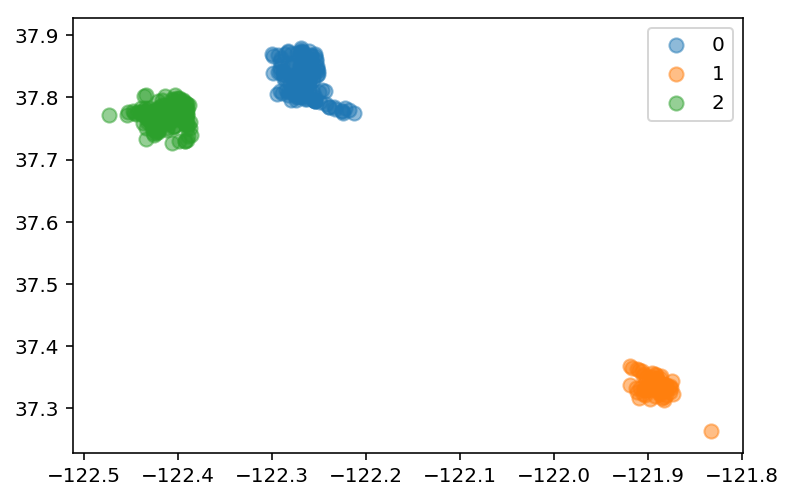

In [224]:
#https://datatofish.com/k-means-clustering-python/

kmeans = KMeans(n_clusters=3).fit(df_station_names[["station_longitude", "station_latitude"]])

df_station_names["label"] = kmeans.labels_

for x in set(list(df_station_names.label)):
    
    df_plot_cluster = df_station_names.query(f"label == {x}")

    plt.scatter(df_plot_cluster['station_longitude'], df_plot_cluster["station_latitude"], s=50, alpha=0.5, label = x);

plt.legend();

In [227]:
df_station_names.to_csv(r'Data/station_geo.csv')

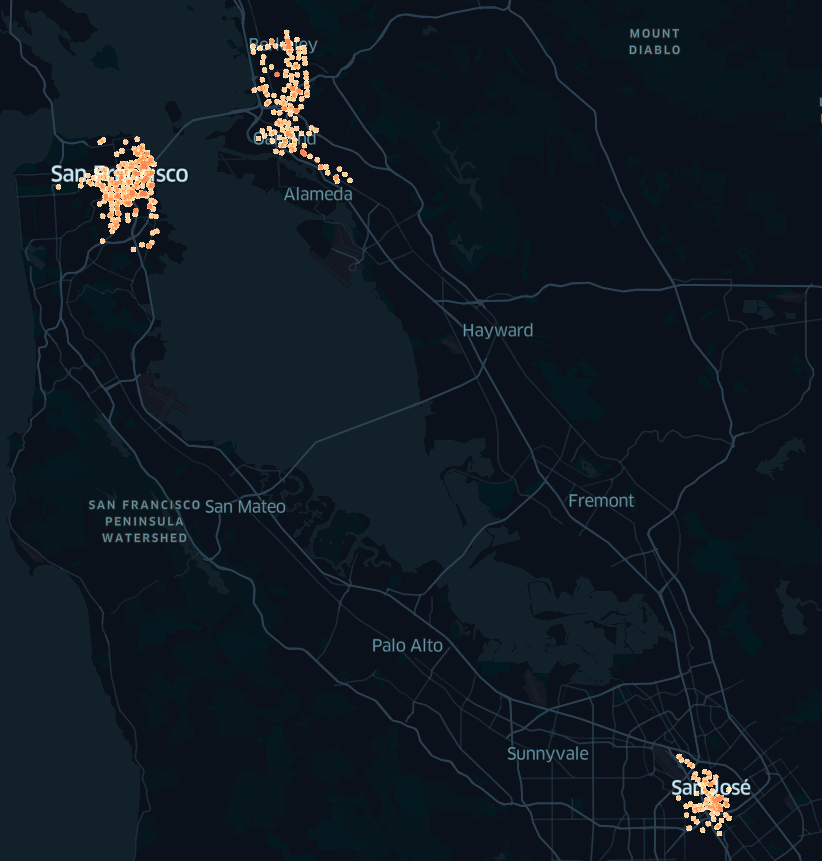

In [230]:
Image(filename="./Pics/geopic.png") 